In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

"""
Column 1: Time in seconds starting from 0 rounded to the closest 0.025s
Column 2: Acceleration reading in G for frontal axis
Column 3: Acceleration reading in G for vertical axis
Column 4: Acceleration reading in G for lateral axis
Column 5: Id of antenna reading sensor
Column 6: Received signal strength indicator (RSSI) 
Column 7: Phase
Column 8: Frequency
Column 9: Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating
"""
column_names = ['Time', 'Frontal Accel', 'Vertical Accel', 'Lateral Accel', 'Antenna ID', 'RSSI', 'Phase', 'Frequency', 'Activity Label']

# Extract Data From Files To DataFrames
root_dir = '/Users/chrisgerlach/Programming/MIDILab/LongitudinalAlgorithmDevelopment/Activity_Recognition/'
dataset_folder_names = ['S1_Dataset', 'S2_Dataset']

all_patient_files = {}  # Dictionary Of All Patient Files Separated By Dataset Folders
for dataset_folder_name in dataset_folder_names:
    dir_path = os.path.join(root_dir, dataset_folder_name)
    dir_files = os.listdir(dir_path)
    dir_files.remove('README.txt')

    dir_patient_files = {}  # Dictionary For Each Dataset Folder
    for file_name in dir_files:  # 
        file_path = os.path.join(dir_path, file_name)
        file = pd.read_csv(file_path, names=column_names)
        dir_patient_files[file_name] = file

    all_patient_files[dataset_folder_name] = dir_patient_files

# Dictionary Of All Patient Files
data_frames = {**all_patient_files['S1_Dataset'], **all_patient_files['S2_Dataset']}


In [83]:
import pandas as pd
import os

column_names = ['Time', 'Frontal Accel', 'Vertical Accel', 'Lateral Accel', 'Antenna ID', 'RSSI', 'Phase', 'Frequency', 'Activity Label']
root_dir = '/Users/chrisgerlach/Programming/MIDILab/LongitudinalAlgorithmDevelopment/Activity_Recognition/'
dataset_folder_names = ['S1_Dataset', 'S2_Dataset']

# Combine all data frames with patient ID and gender
data_frames = []
for dataset_folder_name in dataset_folder_names:
    dir_path = os.path.join(root_dir, dataset_folder_name)
    dir_files = os.listdir(dir_path)
    if 'README.txt' in dir_files:
        dir_files.remove('README.txt')

    for file_name in dir_files:
        file_path = os.path.join(dir_path, file_name)
        patient_ID = file_name.split('p')[1][0:2]  # Extract patient ID
        gender = file_name.split('p')[1][2]  # Extract gender
        file_df = pd.read_csv(file_path, names=column_names)
        file_df['Patient ID'] = patient_ID
        file_df['Gender'] = gender
        data_frames.append(file_df)

df = pd.concat(data_frames, ignore_index=True)

In [84]:
print(df)

          Time  Frontal Accel  Vertical Accel  Lateral Accel  Antenna ID  \
0        0.000       0.096148         1.01970      -0.196130           1   
1        0.025       0.096148         1.01970      -0.196130           1   
2        0.050       0.096148         1.01970      -0.196130           1   
3        0.075       0.096148         1.01970      -0.196130           1   
4        0.100       0.096148         1.01970      -0.196130           1   
...        ...            ...             ...            ...         ...   
75123  469.500       0.987280         0.66373       0.077541           1   
75124  479.750       0.987280         0.66373       0.077541           1   
75125  489.500       0.987280         0.66373       0.077541           1   
75126  497.750       0.987280         0.66373       0.077541           1   
75127  513.500       0.858300         0.66373      -0.025087           3   

       RSSI    Phase  Frequency  Activity Label Patient ID Gender  
0     -42.5  2.0555

In [93]:
# Add additional columns
acceleration = df['Frontal Accel'] ** 2 + df['Vertical Accel'] ** 2 + df['Lateral Accel'] ** 2
df['Acceleration'] = np.sqrt(acceleration)
df

,Time,Frontal Accel,Vertical Accel,Lateral Accel,Antenna ID,RSSI,Phase,Frequency,Activity Label,Patient ID,Gender,Acceleration
0,0.000,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,51,F,1.042832
1,0.025,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,51,F,1.042832
2,0.050,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,51,F,1.042832
3,0.075,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,51,F,1.042832
4,0.100,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,51,F,1.042832
...,...,...,...,...,...,...,...,...,...,...,...,...
75123,469.500,0.987280,0.66373,0.077541,1,-59.0,1.16280,921.25,2,10,F,1.192171
75124,479.750,0.987280,0.66373,0.077541,1,-59.5,0.60132,922.25,2,10,F,1.192171
75125,489.500,0.987280,0.66373,0.077541,1,-60.0,0.28225,922.25,2,10,F,1.192171
75126,497.750,0.987280,0.66373,0.077541,1,-59.5,1.46800,920.75,2,10,F,1.192171


In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encode patient IDs and gender
label_encoder_patient = LabelEncoder()
df['Patient ID Encoded'] = label_encoder_patient.fit_transform(df['Patient ID'])

label_encoder_gender = LabelEncoder()
df['Gender Encoded'] = label_encoder_gender.fit_transform(df['Gender'])

# One-hot encode patient IDs and gender
onehot_encoder_patient = OneHotEncoder(sparse_output=False)
onehot_encoder_gender = OneHotEncoder(sparse_output=False)

patient_ID_encoded = onehot_encoder_patient.fit_transform(df[['Patient ID Encoded']])
gender_encoded = onehot_encoder_gender.fit_transform(df[['Gender Encoded']])

# Add one-hot encoded patient IDs and gender back to the features dataframe
patient_ID_encoded_df = pd.DataFrame(patient_ID_encoded, columns=onehot_encoder_patient.get_feature_names_out(['Patient ID Encoded']))
gender_encoded_df = pd.DataFrame(gender_encoded, columns=onehot_encoder_gender.get_feature_names_out(['Gender Encoded']))

df = pd.concat([df, patient_ID_encoded_df, gender_encoded_df], axis=1)

# Drop the original Patient ID and gender columns
df.drop(['Patient ID', 'Gender', 'Patient ID Encoded', 'Gender Encoded'], axis=1, inplace=True)


In [101]:
df

,Time,Frontal Accel,Vertical Accel,Lateral Accel,Antenna ID,RSSI,Phase,Frequency,Activity Label,Acceleration,...,Patient ID Encoded_52,Patient ID Encoded_53,Patient ID Encoded_54,Patient ID Encoded_55,Patient ID Encoded_56,Patient ID Encoded_57,Patient ID Encoded_58,Patient ID Encoded_59,Gender Encoded_0,Gender Encoded_1
0,0.000,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,1.042832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.025,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,1.042832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.050,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,1.042832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.075,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,1.042832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.100,0.096148,1.01970,-0.196130,1,-42.5,2.05550,924.25,4,1.042832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75123,469.500,0.987280,0.66373,0.077541,1,-59.0,1.16280,921.25,2,1.192171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75124,479.750,0.987280,0.66373,0.077541,1,-59.5,0.60132,922.25,2,1.192171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75125,489.500,0.987280,0.66373,0.077541,1,-60.0,0.28225,922.25,2,1.192171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
75126,497.750,0.987280,0.66373,0.077541,1,-59.5,1.46800,920.75,2,1.192171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
from sklearn.model_selection import train_test_split

# Split the data into features and labels
y = df['Activity Label']
X = df.drop('Activity Label', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9928790097164915
              precision    recall  f1-score   support

           1       0.98      0.99      0.99      3313
           2       0.98      0.99      0.98       950
           3       1.00      1.00      1.00     10307
           4       0.96      0.84      0.90       456

    accuracy                           0.99     15026
   macro avg       0.98      0.96      0.97     15026
weighted avg       0.99      0.99      0.99     15026



In [100]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.95414615 0.96153334 0.90290164 0.93304493 0.89437604]
Mean cross-validation score: 0.9292004182212839


In [107]:
from sklearn.feature_selection import SelectFromModel

# Train a Random Forest classifier for feature selection
feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector.fit(X_train, y_train)

# Get feature importances from the trained Random Forest
importances = feature_selector.feature_importances_

# Select features based on importance
selector = SelectFromModel(feature_selector, threshold="mean", prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the Random Forest classifier with selected features
model_selected = RandomForestClassifier(n_estimators=100, random_state=42)
model_selected.fit(X_train_selected, y_train)

# Predict on the test set
y_pred = model_selected.predict(X_test_selected)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print selected features
selected_features = np.where(selector.get_support())[0]
print("Selected Features:", df.columns[selected_features])


/opt/anaconda3/envs/LongDataAlgDev/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/LongDataAlgDev/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Accuracy: 0.991481432184214
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      3313
           2       0.97      0.98      0.98       950
           3       1.00      1.00      1.00     10307
           4       0.95      0.84      0.89       456

    accuracy                           0.99     15026
   macro avg       0.98      0.95      0.96     15026
weighted avg       0.99      0.99      0.99     15026

Selected Features: Index(['Time', 'Frontal Accel', 'Vertical Accel', 'Lateral Accel',
       'Antenna ID', 'RSSI', 'Activity Label'],
      dtype='object')


# Activity Recognition Using Sensor Data

This notebook contains the steps to predict the type of activity performed by individuals based on sensor data. The focus is on leveraging various classification models to identify key factors influencing activity recognition.

## Import Libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import itertools

## Load and Explore Data

In [115]:
# Define column names
column_names = ['Time', 'Frontal Accel', 'Vertical Accel', 'Lateral Accel', 'Antenna ID', 'RSSI', 'Phase', 'Frequency', 'Activity Label']

# Extract Data From Files To DataFrames
root_dir = '/Users/chrisgerlach/Programming/MIDILab/LongitudinalAlgorithmDevelopment/Activity_Recognition/'
dataset_folder_names = ['S1_Dataset', 'S2_Dataset']

all_patient_files = {}  # Dictionary Of All Patient Files Separated By Dataset Folders
for dataset_folder_name in dataset_folder_names:
    dir_path = os.path.join(root_dir, dataset_folder_name)
    dir_files = os.listdir(dir_path)
    dir_files.remove('README.txt')

    dir_patient_files = {}  # Dictionary For Each Dataset Folder
    for file_name in dir_files:  
        file_path = os.path.join(dir_path, file_name)
        file = pd.read_csv(file_path, names=column_names)
        dir_patient_files[file_name] = file

    all_patient_files[dataset_folder_name] = dir_patient_files

# Concatenate all dataframes
df = pd.concat([pd.concat(files.values()) for files in all_patient_files.values()], ignore_index=True)

In [116]:
# Add additional columns
acceleration = df['Frontal Accel'] ** 2 + df['Vertical Accel'] ** 2 + df['Lateral Accel'] ** 2
df['Acceleration'] = np.sqrt(acceleration)

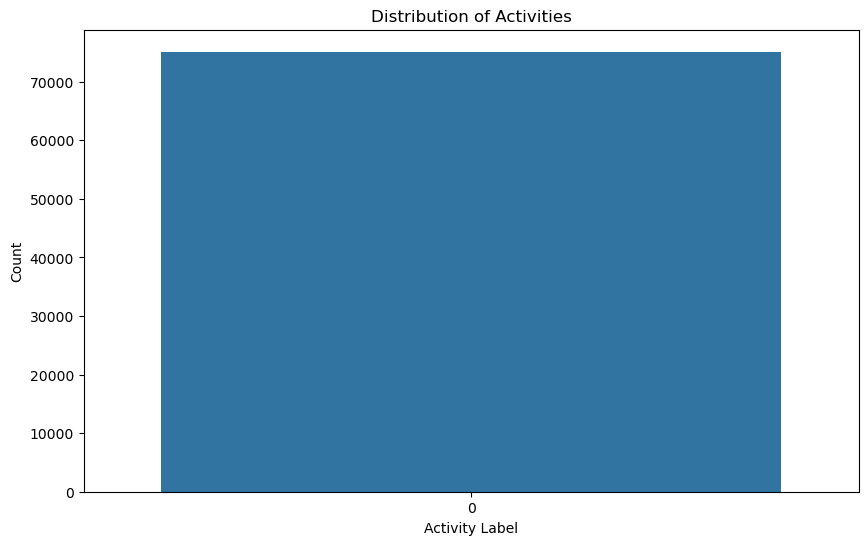

In [117]:
plt.figure(figsize=(10, 6))
sns.countplot(df['Activity Label'])
plt.title('Distribution of Activities')
plt.xlabel('Activity Label')
plt.ylabel('Count')
plt.show()

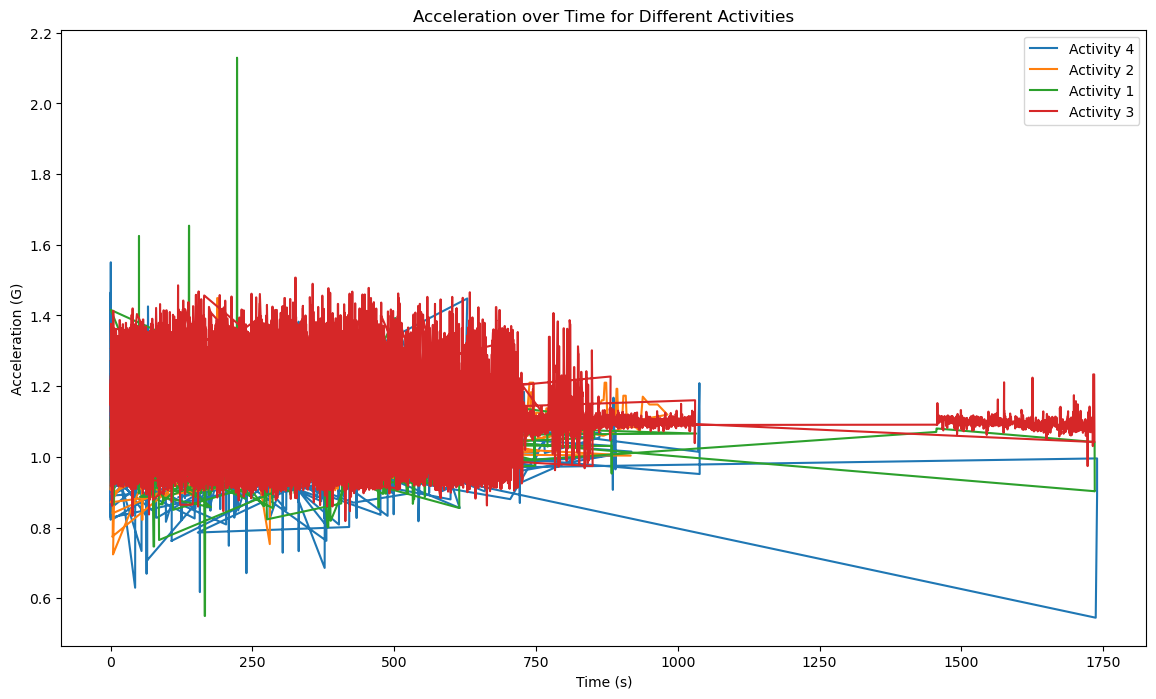

In [118]:
plt.figure(figsize=(14, 8))
for label in df['Activity Label'].unique():
    subset = df[df['Activity Label'] == label]
    plt.plot(subset['Time'], subset['Acceleration'], label=f'Activity {label}')
plt.title('Acceleration over Time for Different Activities')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (G)')
plt.legend()
plt.show()
